## DECISION TREE

In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree

In [199]:
import warnings
warnings.filterwarnings('ignore')

In [201]:
df= pd.read_excel(r'C:\Users\HP\Videos\Assignment question\heart_disease.xlsx',sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [203]:
df.shape

(908, 13)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [207]:
##Null values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [209]:
#filling the missing values in 'oldpeak'
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)


In [211]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### Exploratory Data Analysis (EDA):

<Figure size 2000x1500 with 0 Axes>

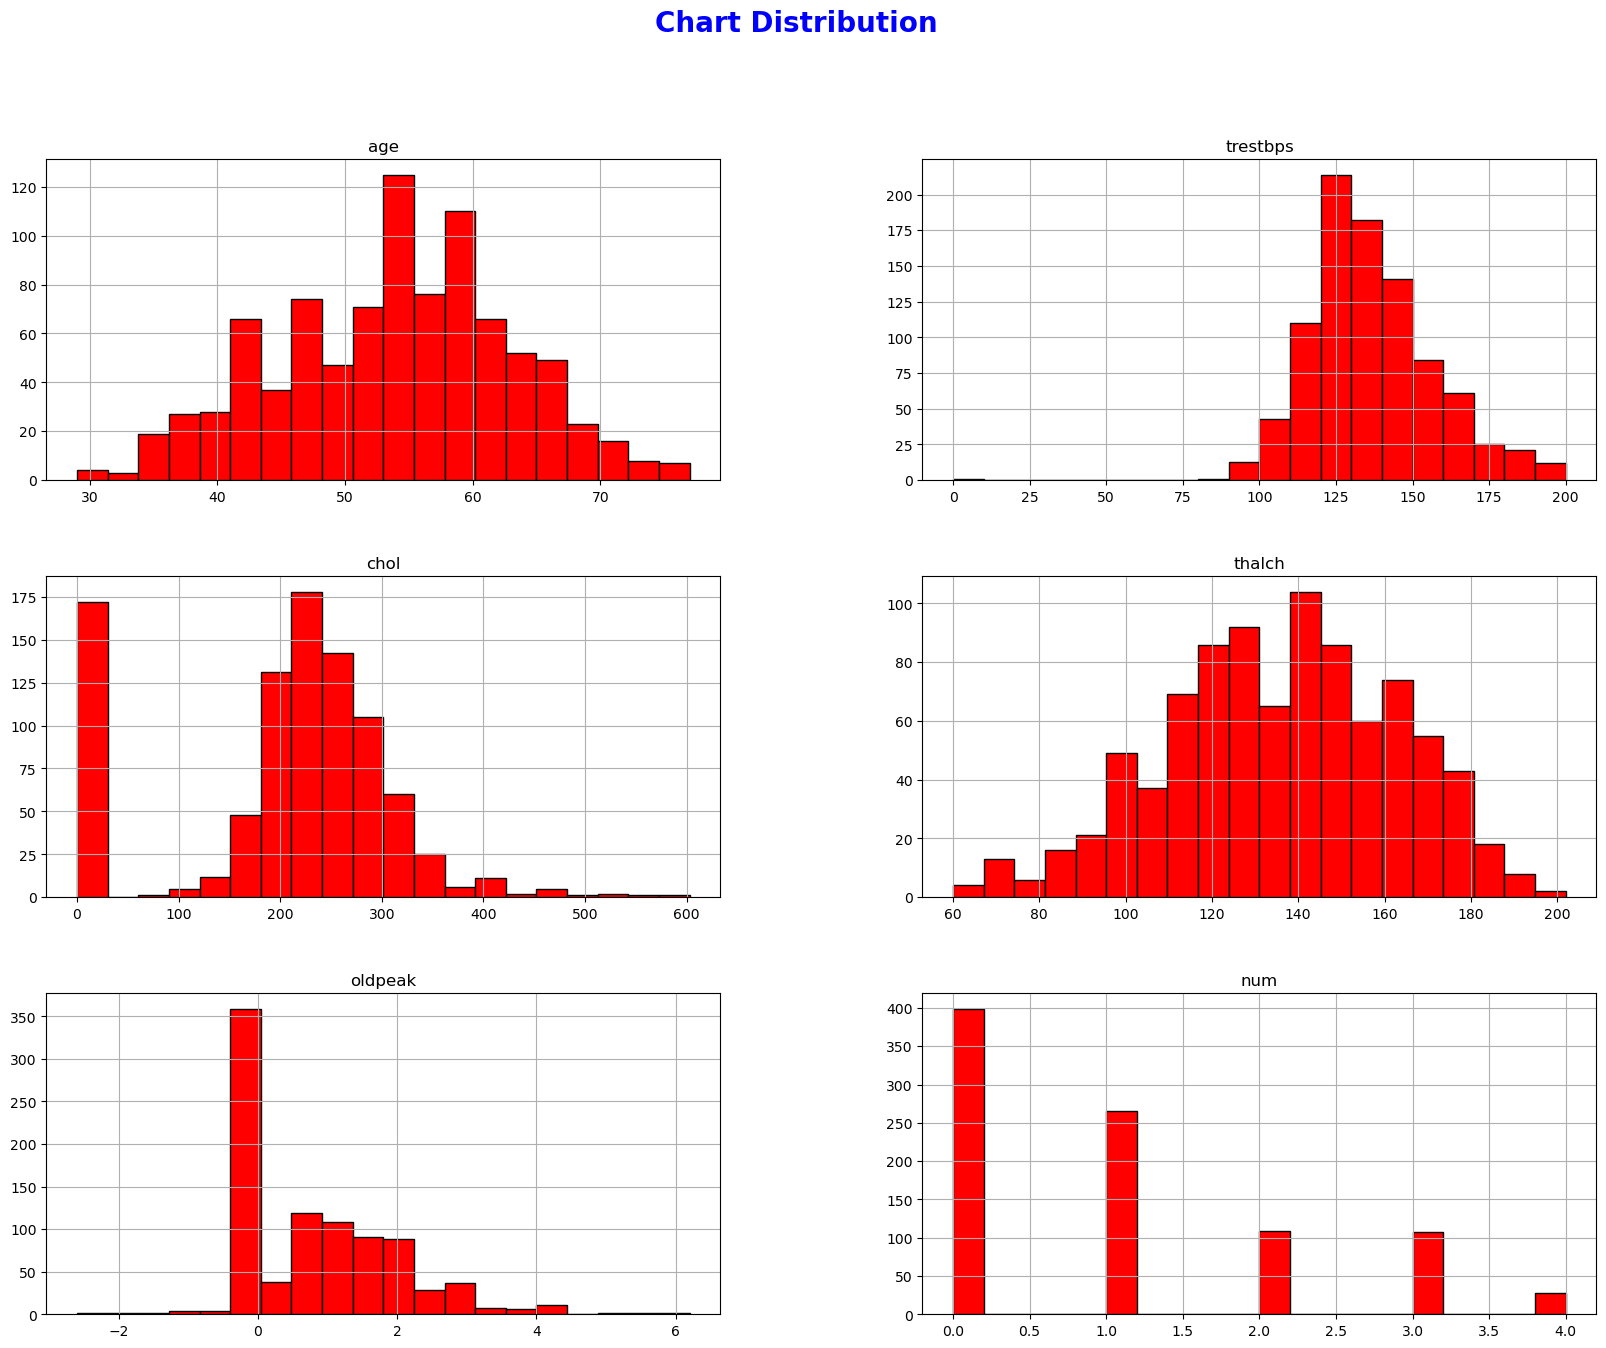

In [214]:
#Histogram-

plt.figure(figsize=(20,15))
df.hist(figsize=(20,15),color='red',edgecolor='black',bins=20,)
plt.suptitle("Chart Distribution",color='Blue',fontsize=20,fontweight='bold')
plt.show()

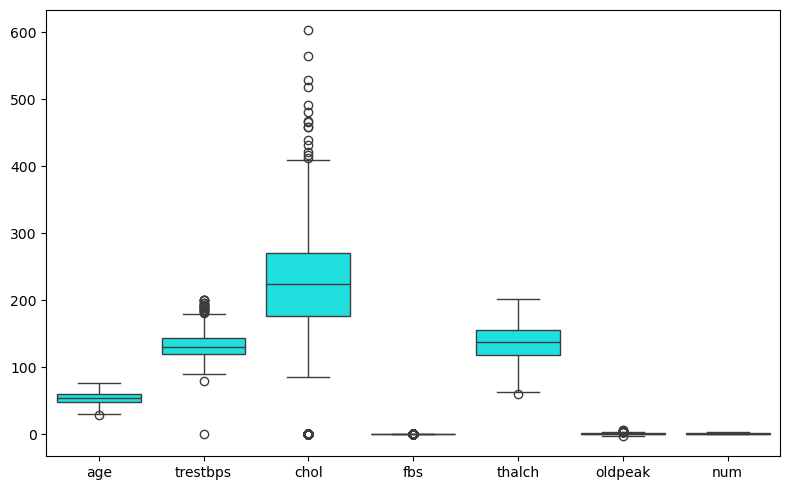

In [216]:
#Boxplot-
plt.figure(figsize=(8,5))
sns.boxplot(data=df,color='cyan')
plt.tight_layout()
plt.show()

In [218]:
#Correlation Matrices-

numeric_data = df.select_dtypes(include=['float64', 'int64'])

numeric_data

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.300000,0
1,41,135,203,132,0.000000,0
2,57,140,192,148,0.400000,0
3,52,118,186,190,0.000000,0
4,57,110,201,126,1.500000,0
...,...,...,...,...,...,...
903,53,125,0,120,1.500000,4
904,62,166,170,120,3.000000,4
905,56,170,0,123,2.500000,4
906,56,144,208,105,0.891253,4


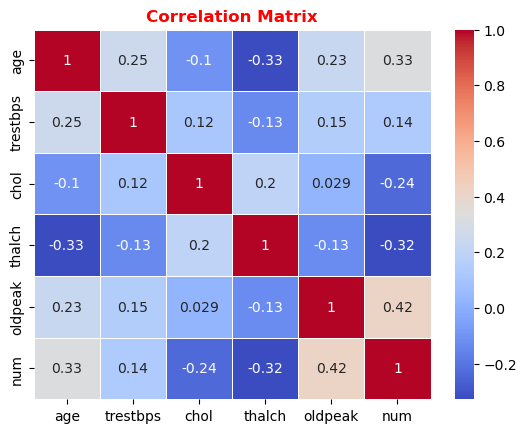

In [220]:
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix',color='red',fontweight='bold')
plt.show()

### Feature Engineering:

In [223]:
#convert bool to integer
df['fbs'] = df['fbs'].astype(int)

In [225]:
#convert all object columns to strings to avoid mixed types
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype(str)

In [227]:
#Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [229]:
#Rename 'num' to 'target' for clarity
df.rename(columns={'num':'target'}, inplace =True)

In [231]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,3,1.5,1,0,0


In [233]:
#split the dataset into fatures (X) and Target (Y)
x=df.drop(columns=['target']) #features
y = df['target'] #Target

In [237]:
#print the shapes of X and Y to verify the split
print("\nFeatures (x) shape" ,x.shape)
print("\nTarget (y) shape" ,y.shape)


Features (x) shape (908, 12)

Target (y) shape (908,)


In [239]:
#split the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

In [241]:
#print the shapes of the split dataset to verify
print("\nTraining features (x_train) shape:", x_train.shape)   #traning features
print("\nTraining features (x_test) shape:", x_test.shape)    #testing features
print("\nTraining target (y_train) shape:", y_train.shape)     #target value in y_train
print("\nTraining target (y_test) shape:", y_test.shape)      #target value in y_test


Training features (x_train) shape: (726, 12)

Training features (x_test) shape: (182, 12)

Training target (y_train) shape: (726,)

Training target (y_test) shape: (182,)


### Decision Tree Classification:

In [170]:
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [139]:
#Evaluate the model
y_pred = dt_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [195]:
print(f'\nAccuracy:{accuracy*100:.2f}%')


Accuracy:54.40%


In [143]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76        89
           1       0.38      0.38      0.38        48
           2       0.42      0.45      0.43        22
           3       0.19      0.18      0.18        17
           4       0.00      0.00      0.00         6

    accuracy                           0.54       182
   macro avg       0.35      0.35      0.35       182
weighted avg       0.53      0.54      0.54       182



In [145]:
print('CConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

CConfusion Matrix:
 [[68 15  4  2  0]
 [16 18  8  6  0]
 [ 3  3 10  5  1]
 [ 4  8  0  3  2]
 [ 0  4  2  0  0]]


In [147]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth =None, ccp_alpha = 0.03)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy')

In [149]:
path = model.cost_complexity_pruning_path(X_train,Y_train)

### Model Evaluation and Analysis:

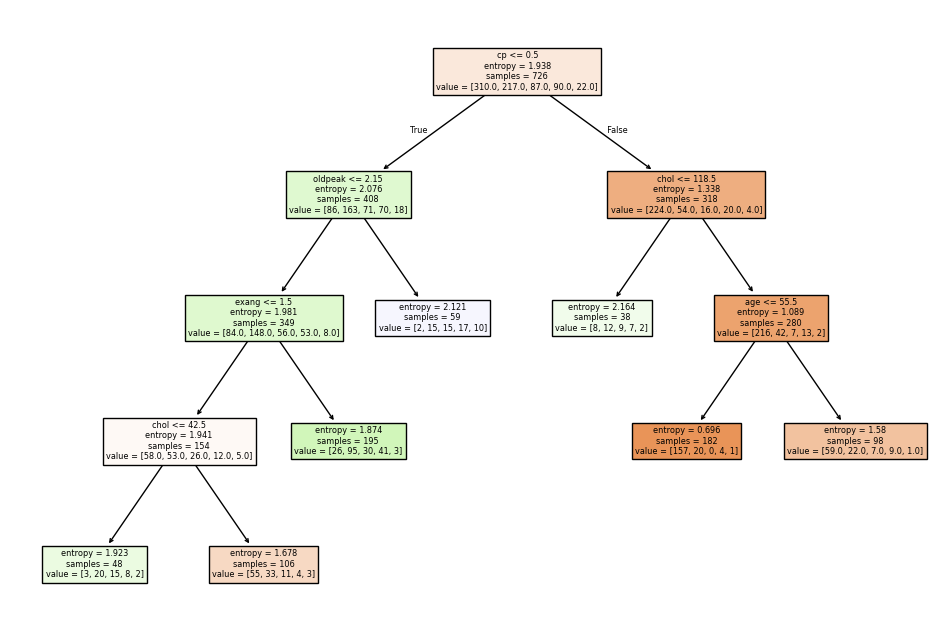

In [181]:
#Plot the decision tree:

plt.figure(figsize=(12,8))
tree.plot_tree(model,filled=True,feature_names=x.columns);

In [183]:
#Predicting on test data
preds = model.predict(x_test)

In [154]:
preds

array([1, 1, 0, 3, 1, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 1, 0, 1, 0, 1, 0, 3,
       1, 1, 0, 3, 3, 0], dtype=int64)

In [189]:
pd.Series(preds).value_counts(sort=True)  #getting the count of each category

0    109
1     59
3     14
Name: count, dtype: int64

In [159]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77        89
           1       0.39      0.48      0.43        48
           2       0.00      0.00      0.00        22
           3       0.21      0.18      0.19        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.26      0.30      0.28       182
weighted avg       0.46      0.56      0.51       182



In [161]:
# Prediction on train data

pred_train = model.predict(x_train)
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       310
           1       0.45      0.59      0.51       217
           2       0.00      0.00      0.00        87
           3       0.29      0.19      0.23        90
           4       0.00      0.00      0.00        22

    accuracy                           0.57       726
   macro avg       0.29      0.33      0.30       726
weighted avg       0.47      0.57      0.51       726

